In [1]:
import os
import gc
import pickle
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# self-defined functions
# from helper import *
# from tabu_helper import *
from tabu import tabu_search

In [2]:
currentPath = os.getcwd()

In [3]:
with open(currentPath + '/clean_data/sectorMap.pkl', 'rb') as f:
    sectorMap = pickle.load(f)
    
with open(currentPath + '/clean_data/inv_sectorMap.pkl', 'rb') as f:
    inv_sectorMap = pickle.load(f)

with open(currentPath + '/clean_data/ratingMap.pkl', 'rb') as f:
    ratingMap = pickle.load(f)
    
train = pd.read_csv(currentPath + '/clean_data/train.csv', index_col=0)
test = pd.read_csv(currentPath + '/clean_data/test.csv', index_col=0)
corr = pd.read_csv(currentPath + '/clean_data/corr.csv', index_col=0)
varDF = pd.read_csv(currentPath + '/clean_data/var.csv', index_col=0)


train.index = pd.DatetimeIndex(train.index)
test.index = pd.DatetimeIndex(test.index)

In [4]:
returnTrain = (train.iloc[-1] - train.iloc[0])/train.iloc[0]
returnTest = (test.iloc[-1] - test.iloc[0])/test.iloc[0]

In [5]:
returnTrain

PNW     0.389053
APD     0.830356
HES     0.354959
AFL    -0.102739
AMGN    0.511195
          ...   
MPC     0.151316
XYL     1.195713
CPRI   -0.051028
LYB     0.084145
ALLE    0.912145
Length: 488, dtype: float64

In [6]:
alpha = 0.05
check_params = {
    "sectorMap": sectorMap,
    "inv_sectorMap": inv_sectorMap,
    "corr_df": corr,
    "risk_series": varDF[str(alpha)],
    "snum_ub": 30,
    "snum_lb": 10,
    "sector_snum_ub": 6,
    "corr_ub": 0.5,
    "risk_all_ub": 0,
    "risk_ind_ub": 0,
    "risk_all_lb": -0.03,
    "risk_ind_lb": -0.05,
    "details": False
}

In [ ]:
testResult = {}

In [21]:
tabu_list_size = 20
iterations_times = 1000
early_stop = 50
neighbor_size = 50
asp_improve_level = -5
seed = None

In [14]:
for s in np.random.randint(10000, size=30):
    if s in list(testResult.keys()):
        continue  
        
    print('seed: %s' % s)
    testResult[s] = tabu_search(
        return_df=returnTrain, params=check_params, tabu_list_size=20, iterations_times=1000, early_stop=30, 
        neighbor_size=50, asp_improve_level=-3, seed=s
    )
    gc.collect()
    print(testResult[s]['best_perf'])
    print('\n\n')

  0%|          | 0/1000 [00:00<?, ?it/s]

seed: 6958


  0%|          | 0/1000 [00:00<?, ?it/s]

36.1125366713696



seed: 4626


  0%|          | 0/1000 [00:00<?, ?it/s]

32.30360468644968



seed: 7263


  0%|          | 0/1000 [00:00<?, ?it/s]

31.639055739881584



seed: 5393


  0%|          | 0/1000 [00:00<?, ?it/s]

40.42598877189703



seed: 6711


  0%|          | 0/1000 [00:00<?, ?it/s]

33.112662867516114



seed: 4880


  0%|          | 0/1000 [00:00<?, ?it/s]

37.426477941637856



seed: 4945


  7%|▋         | 69/1000 [00:25<06:02,  2.57it/s]


37.604532904661305



seed: 6928


  0%|          | 0/1000 [00:00<?, ?it/s]

28.857343203822712



seed: 5114


  0%|          | 0/1000 [00:00<?, ?it/s]

41.099933687835225



seed: 6159


  0%|          | 0/1000 [00:00<?, ?it/s]

34.422321506316706



seed: 7341


  0%|          | 0/1000 [00:00<?, ?it/s]

37.40513174407831



seed: 9089


  0%|          | 0/1000 [00:00<?, ?it/s]

32.85334669465592



seed: 6808


  0%|          | 0/1000 [00:00<?, ?it/s]

40.17025748873322



seed: 4302


  0%|          | 0/1000 [00:00<?, ?it/s]

33.88185013072197



seed: 6783


  0%|          | 0/1000 [00:00<?, ?it/s]

41.53773452364513



seed: 3308


  0%|          | 0/1000 [00:00<?, ?it/s]

36.894155021765



seed: 1670


  0%|          | 0/1000 [00:00<?, ?it/s]

24.896873275780155



seed: 1599


  0%|          | 0/1000 [00:00<?, ?it/s]

44.68265400614269



seed: 1882


  0%|          | 0/1000 [00:00<?, ?it/s]

32.834347284244664



seed: 5466


  0%|          | 0/1000 [00:00<?, ?it/s]

34.49029522805103



seed: 9143


  0%|          | 0/1000 [00:00<?, ?it/s]

31.770135056034842



seed: 6503


  0%|          | 0/1000 [00:00<?, ?it/s]

38.057584449011046



seed: 5370


  0%|          | 0/1000 [00:00<?, ?it/s]

34.98764988277176



seed: 9847


  0%|          | 0/1000 [00:00<?, ?it/s]

46.385874439460046



seed: 1605


  0%|          | 0/1000 [00:00<?, ?it/s]

30.776926546382775



seed: 4803


  0%|          | 0/1000 [00:00<?, ?it/s]

40.66768866348241



seed: 7559


  0%|          | 0/1000 [00:00<?, ?it/s]

40.09936390779824



seed: 6021


  0%|          | 0/1000 [00:00<?, ?it/s]

32.64799997992572



seed: 7678


  8%|▊         | 77/1000 [00:31<06:31,  2.36it/s]

41.90186583782314





In [15]:
sorted([(k, v['best_perf']) for k, v in testResult.items()], key=lambda x: x[1])

[(1670, 24.896873275780155),
 (2682, 28.121687653102658),
 (3901, 28.607003290193358),
 (6928, 28.857343203822712),
 (8709, 29.082108231532843),
 (6375, 29.648924069247595),
 (9171, 30.278625531688775),
 (3168, 30.71017663611119),
 (1605, 30.776926546382775),
 (6084, 31.465951182516495),
 (9741, 31.584705861239208),
 (7263, 31.639055739881584),
 (9143, 31.770135056034842),
 (7516, 31.8804802889486),
 (2359, 31.979610425822838),
 (4963, 32.0599531237861),
 (938, 32.2515817842915),
 (4626, 32.30360468644968),
 (6021, 32.64799997992572),
 (9564, 32.65669235193773),
 (1864, 32.72239084942567),
 (1882, 32.834347284244664),
 (9089, 32.85334669465592),
 (7431, 33.09370745515693),
 (7461, 33.094568269701185),
 (6711, 33.112662867516114),
 (126, 33.35835639521162),
 (135, 33.45405237402626),
 (643, 33.49610973398126),
 (4302, 33.88185013072197),
 (9180, 33.98404187224783),
 (5566, 34.06869296734343),
 (6159, 34.422321506316706),
 (5466, 34.49029522805103),
 (4873, 34.63612839665274),
 (9068, 34

46.65888498649443


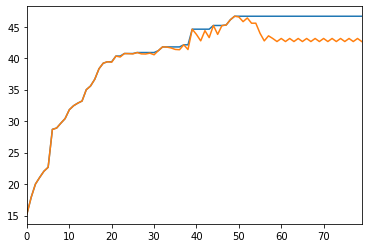

In [16]:
%matplotlib inline 

print(testResult[4694]['best_perf'])
pd.Series(testResult[4694]['best_perfList']).plot()
pd.Series(testResult[4694]['cand_perfList']).plot()

In [ ]:
tabu_list_size = 20
iterations_times = 1000
early_stop = 50
neighbor_size = 50
asp_improve_level = -5
seed = None

In [22]:
tryOne = tabu_search(
    return_df=returnTrain, 
    params=check_params, 
    tabu_list_size=tabu_list_size, 
    iterations_times=iterations_times, 
    early_stop=early_stop, 
    neighbor_size=neighbor_size, 
    asp_improve_level=asp_improve_level, 
    seed=seed
)

 23%|██▎       | 231/1000 [01:28<04:51,  2.64it/s]


In [23]:
tryOne['best_perfList']

[7.51410704504589,
 9.346066994872823,
 15.359809921307745,
 15.879100310560242,
 16.947726298923662,
 17.962798083863426,
 20.78853922630739,
 21.697663832764846,
 22.934330888430623,
 24.320448025090055,
 26.132761616909402,
 27.150286779727633,
 28.564226657354663,
 30.455863636787555,
 30.455863636787555,
 30.455863636787555,
 30.455863636787555,
 30.455863636787555,
 30.530377639515585,
 30.80555730354873,
 34.13063684862413,
 35.2607521769023,
 35.805922864194784,
 36.60778278271486,
 36.85667044338626,
 36.85667044338626,
 36.85667044338626,
 36.85667044338626,
 36.85667044338626,
 36.85667044338626,
 36.90546413117468,
 37.40321234635519,
 37.75968330842515,
 38.171743280725345,
 39.90396444187988,
 40.11124764533382,
 40.35679531566632,
 40.74397567420348,
 41.305278197071885,
 41.305278197071885,
 41.305278197071885,
 41.305278197071885,
 41.305278197071885,
 41.305278197071885,
 41.305278197071885,
 41.305278197071885,
 41.305278197071885,
 41.708889115972,
 41.708889115972,

In [24]:
tryTwo = tabu_search(
    return_df=returnTrain, 
    params=check_params, 
    tabu_list_size=tabu_list_size, 
    iterations_times=iterations_times, 
    early_stop=early_stop, 
    neighbor_size=neighbor_size, 
    asp_improve_level=asp_improve_level, 
    seed=seed
)

 22%|██▏       | 218/1000 [04:15<12:54,  1.01it/s]


In [25]:
tryTwo['best_perfList']

[12.210436557552296,
 15.44447256309161,
 17.494797508933974,
 19.204169845258765,
 20.875304094261868,
 21.250954173639983,
 23.47733043843161,
 24.239852027378074,
 25.03169335748431,
 25.45856078024536,
 28.20679274629911,
 28.9930952852366,
 29.108916175160367,
 29.479973027771308,
 30.203085155917762,
 30.203085155917762,
 30.931444010495323,
 30.931444010495323,
 30.931444010495323,
 30.931444010495323,
 35.18223269151585,
 35.849557469403315,
 35.849557469403315,
 36.06213361204277,
 36.61899891052148,
 37.12694129527522,
 37.12694129527522,
 37.344537342785245,
 37.41875541537797,
 37.761389749994876,
 37.821477360643634,
 37.821477360643634,
 38.13781298529229,
 38.68123635423182,
 38.68123635423182,
 38.68123635423182,
 38.814185107692914,
 39.0463326670316,
 39.05414909732024,
 39.91183219104693,
 40.28993734437013,
 40.28993734437013,
 40.28993734437013,
 40.28993734437013,
 41.22750166112349,
 41.9650693964641,
 42.02034887230238,
 42.02034887230238,
 42.02034887230238,
 4

In [26]:
tryThird = tabu_search(
    return_df=returnTrain, 
    params=check_params, 
    tabu_list_size=tabu_list_size, 
    iterations_times=iterations_times, 
    early_stop=early_stop, 
    neighbor_size=neighbor_size, 
    asp_improve_level=asp_improve_level, 
    seed=seed
)
tryThird['best_perfList']

 26%|██▌       | 259/1000 [04:38<10:37,  1.16it/s]


[15.60912624095113,
 16.39643136344556,
 18.4349552888308,
 19.00667077780866,
 19.80275490239149,
 21.08805814407744,
 22.501998021704473,
 23.225110149850924,
 24.20031676142117,
 24.820057635827357,
 25.422073551512398,
 26.036559532820807,
 26.7846848933284,
 27.197498015754988,
 28.58361515241442,
 30.633940098256783,
 31.144561184646992,
 31.144561184646992,
 31.753617426237213,
 31.753617426237213,
 32.106599997684185,
 32.92392851459874,
 33.22523159391896,
 34.47347906671342,
 34.53584233081205,
 36.611474975006836,
 36.81948846860643,
 36.81948846860643,
 38.22351348306836,
 38.22351348306836,
 38.22351348306836,
 38.22351348306836,
 38.53428381750153,
 38.55192646329154,
 38.55192646329154,
 38.55192646329154,
 39.37621008763914,
 39.55226140658841,
 39.55226140658841,
 39.55226140658841,
 40.06216302777217,
 41.001326977323984,
 41.001326977323984,
 41.134192196362825,
 41.4455321648475,
 41.5289146111379,
 41.82239593095467,
 42.54651222414097,
 42.77510565940498,
 42.8662

In [27]:
tryFourth = tabu_search(
    return_df=returnTrain, 
    params=check_params, 
    tabu_list_size=tabu_list_size, 
    iterations_times=iterations_times, 
    early_stop=early_stop, 
    neighbor_size=neighbor_size, 
    asp_improve_level=asp_improve_level, 
    seed=seed
)
tryFourth['best_perfList']

 20%|█▉        | 197/1000 [10:32<36:35,  2.73s/it] 


[11.91481974827869,
 13.859578651199941,
 16.25930227258333,
 18.6623607110403,
 20.723561963531047,
 23.333125957905168,
 23.948705766909264,
 25.87263338085028,
 28.257248765465665,
 30.483625030257297,
 31.148325574721902,
 32.5066436734422,
 32.65130329785534,
 36.502406404767505,
 36.87352222160587,
 37.75367965401886,
 37.75367965401886,
 37.75367965401886,
 38.03947163966202,
 38.03947163966202,
 38.0565303158722,
 38.0565303158722,
 39.86381948378296,
 39.86381948378296,
 40.026503325815746,
 40.17717615930044,
 40.371477117717944,
 40.506661731826625,
 40.80960296928379,
 41.3100623534289,
 41.3100623534289,
 41.3100623534289,
 41.3100623534289,
 41.3100623534289,
 41.890078515625305,
 41.890078515625305,
 41.890078515625305,
 42.578671594818154,
 44.264177242521576,
 44.264177242521576,
 44.264177242521576,
 44.388319276382475,
 44.388319276382475,
 44.676420610773846,
 44.676420610773846,
 45.30095855577923,
 45.30095855577923,
 45.30095855577923,
 45.30095855577923,
 45.300